In [1]:
%%capture
if 0:
    %pip install transformers timm torch-snippets kaggle

In [13]:
import sys; sys.path.append('../')
from torch_snippets import *
from clip.infer import get_image_embeddings, find_matches
from clip.models import CLIP
from clip.config import ClipConfig
from clip.dataset import build_clip_data_loaders

In [14]:
data_download_path = P("/home/yyr/Zapdos/ml-datasets/flickr-8k-kaggle/")

config = ClipConfig()
config.image_path = data_download_path / "Images"
config.captions_csv_path = data_download_path / "captions.csv"

model = CLIP.from_pretrained("results/checkpoint-4000/", config)
_ = model.to(config.device)

_, val_dl = build_clip_data_loaders(config)
image_embeddings = get_image_embeddings(val_dl, model)

[09/23/23 23:48:40] INFO     Loaded weights from results/checkpoint-4000/pytorch_model.bin to given model                                      ]8;id=917250;file:///mnt/347832F37832B388/projects/MCVP2e/Chapter-15b/CLIP/nbs/../clip/models.py:105\models.py]8;;\:]8;id=422881;file:///mnt/347832F37832B388/projects/MCVP2e/Chapter-15b/CLIP/nbs/../clip/models.py:105#from_pretrained:105\from_pretrained:105]8;;\

Output()

[09/23/23 23:49:14] INFO     Creating encoded captions for train dataset... - Completed in 33.42 s                                                ]8;id=331652;file:///home/yyr/anaconda3/envs/mcvp-book/lib/python3.8/contextlib.py:120\contextlib.py]8;;\:]8;id=472168;file:///home/yyr/anaconda3/envs/mcvp-book/lib/python3.8/contextlib.py:120#__exit__:120\__exit__:120]8;;\

Output()

[09/23/23 23:49:24] INFO     Creating encoded captions for valid dataset... - Completed in 8.92 s                                                 ]8;id=553135;file:///home/yyr/anaconda3/envs/mcvp-book/lib/python3.8/contextlib.py:120\contextlib.py]8;;\:]8;id=277330;file:///home/yyr/anaconda3/envs/mcvp-book/lib/python3.8/contextlib.py:120#__exit__:120\__exit__:120]8;;\

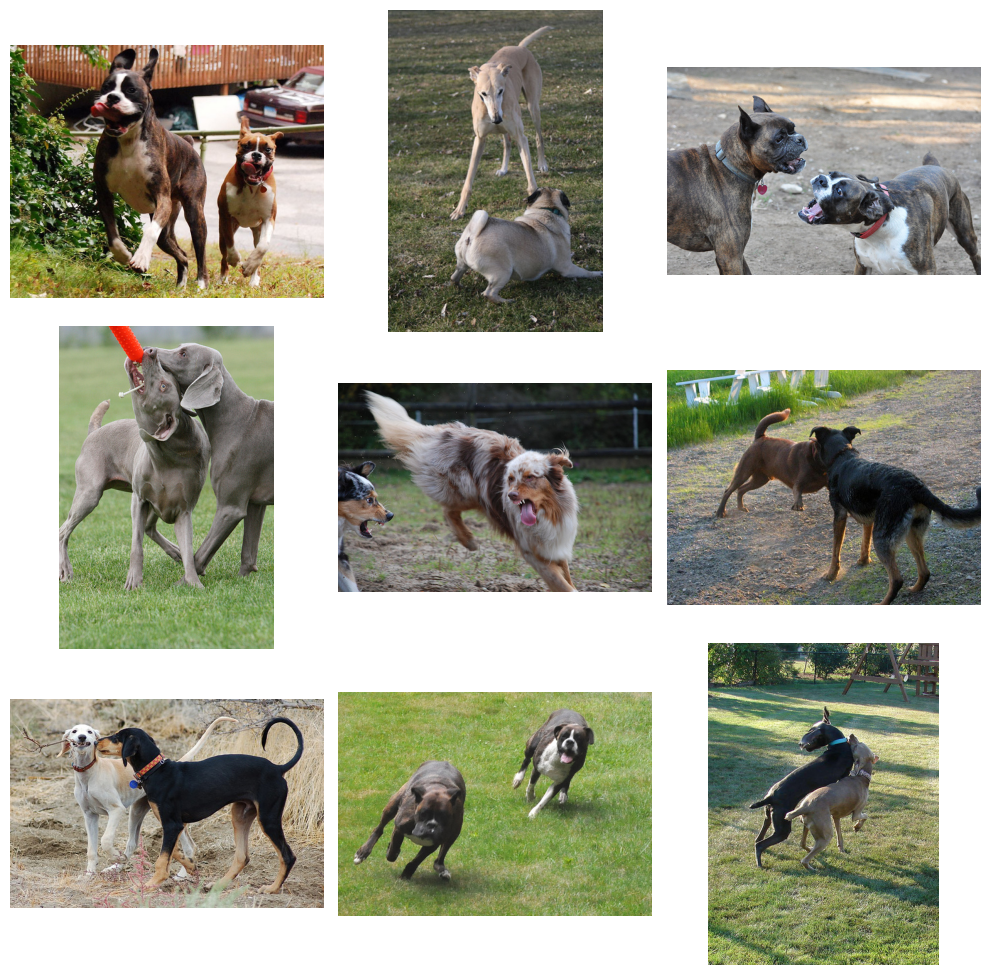

In [17]:
find_matches(model, image_embeddings, query="dogs on the grass", image_filenames=val_dl.dataset.image_filenames)